In [14]:
import urllib
import requests
import json
import pandas as pd
from pandas import read_sql
import datetime
import matplotlib.pyplot as plt
import os
import numpy as np
from copy import deepcopy
import pymysql as mdb

In [15]:
afile="/Users/abramvandergeest/mysql_insightwiki_auth.txt"
a=open(afile)
passwd=a.readline().rstrip()
a.close()
host='localhost'; user='abram.ghost';db='wikidata2011'
con = mdb.connect(host, user, passwd, db)

In [16]:
def datefromstr(str):
    return datetime.datetime(int(str[0:4]), int(str[5:7]),int(str[8:]))

def date_parse(str):
    year =int(str[:4])
    month=int(str[4:6])
    day=int(str[6:8])
    hour=int(str[8:])
    return datetime.datetime(year,month,day,hour)

In [17]:
call="http://elections.huffingtonpost.com/pollster/api/charts.json"
#url='http://elections.huffingtonpost.com/pollster/api/'
#typ="charts/"
#slug="2012-general-election-romney-vs-obama.json"
#call=url+typ+slug

In [18]:
r = requests.get(call)
r.status_code
r.headers['content-type']
charts=r.json()

In [19]:
terms=['primary','gop','national']
for chart in charts:
    slug=chart['slug']
    if all([t in slug for t in terms]):
        print slug

2012-national-gop-primary
2016-national-gop-primary


In [20]:
call='http://elections.huffingtonpost.com/pollster/api/charts/2012-national-gop-primary'
r = requests.get(call)
r.status_code
r.headers['content-type']
gopprim2012=r.json()

In [21]:
#I need a list of candidates, but not all dates have all candidates 
#so I create a list to add all the candidates for each day then
#I turn it into a set to det the unique values
cand=[]

for date in gopprim2012['estimates_by_date']:
    for est in date['estimates']:
        cand.append(est['choice'])
        #print est
        
cands=set(cand)

In [22]:
rowinit={'date':"2011",'Bachmann':0,'Perry':0,'Huntsman':0,'Santorum':0,'Roemer':0,'Romney':0,'Other':0,'Undecided':0,'Cain':0,'Paul':0,'Not Voting':0,'Karger':0,'Gingrich':0}
data=[]

for date in gopprim2012['estimates_by_date']:
#if True:
    #date=gopprim2012['estimates_by_date'][3]
    row=deepcopy(rowinit)
    #print row
    #print date['date']
    row['date']=datefromstr(date['date'])
    for est in date['estimates']:
         row[est['choice']]=est['value']
    data.append(row)
    #print row
    
df= pd.DataFrame(data)

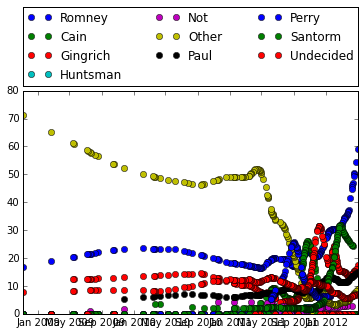

In [23]:
%matplotlib inline
dtp=df[['date','Romney']].values
dtp[0]
plt.plot_date(df[['date']].values,df[['Romney']].values,label="Romney")
plt.plot_date(df[['date']].values,df[['Cain']].values,label="Cain")
plt.plot_date(df[['date']].values,df[['Gingrich']].values,label="Gingrich")
plt.plot_date(df[['date']].values,df[['Huntsman']].values,label="Huntsman")
plt.plot_date(df[['date']].values,df[['Not Voting']].values,label="Not")
plt.plot_date(df[['date']].values,df[['Other']].values,label="Other")
plt.plot_date(df[['date']].values,df[['Paul']].values,label="Paul")
plt.plot_date(df[['date']].values,df[['Perry']].values,label="Perry")
plt.plot_date(df[['date']].values,df[['Santorum']].values,label="Santorm")
plt.plot_date(df[['date']].values,df[['Undecided']].values,label="Undecided")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,  ncol=3, mode="expand", borderaxespad=0.)
plt.show()
dfhuff=df

In [35]:
with con:
    curt= con.cursor()
    #sql="SELECT COUNT(*) FROM `topics` "
    
    sql="SELECT `Id`,`topic_label`,`topic_string` FROM `topics`;"
    curt.execute(sql)
    topics=[]
    for topic in curt:
        topics.append(topic)

data={}
df=[]
with con:
    curt= con.cursor()
    #sql="SELECT COUNT(*) FROM `topics` "
    #curt.execute(sql)
    sql="SELECT `Id`,`topic_label`,`topic_string` FROM `topics`;"
    curt.execute(sql)
    for row in curt:
        #cur = con.cursor()
        sql='''SELECT `page_views`.`count` AS `vc`,`page_views`.`date` AS `vd` 
             FROM `topics` INNER JOIN `page_views` on `topics`.`ID` = `page_views`.`topic_id` 
             WHERE `topics`.`id`=%s '''

        #print sql
        
        data[row[1]]=read_sql(sql, con,params=[row[0]])
        #df.append([row[1],read_sql(sql, con,params=[row[0]])])
        #data[row[1]]=df[len(df)-1][1]

topicdata=data

rickperry


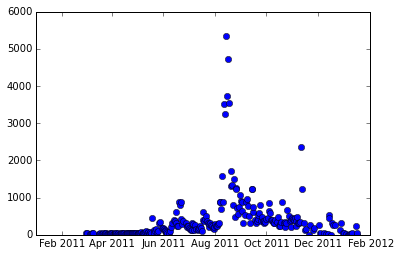

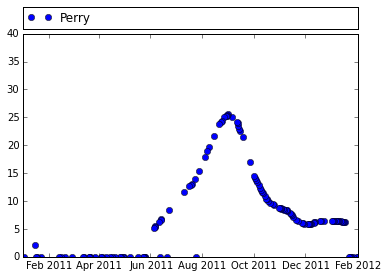

In [36]:
i=7
xmin=datetime.datetime(2011,1,1)
xmax=datetime.datetime(2012,2,1)
ymin=0;ymax=40;
%matplotlib inline
ilabel=topics[i][2].rsplit()[1]
top=topics[i][1]#topic to consider for now
print top
data[top]['date']=map(lambda x:date_parse(x),data[top]['vd'] )
#df[1][['tl','vd','vc']]
plt.plot_date(data[top][['date']].values,data[top][['vc']].values)
plt.xlim([xmin,xmax])
plt.show()

a=plt.plot_date(dfhuff[['date']].values,dfhuff[[ilabel]].values,label=ilabel)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,  ncol=3, mode="expand", borderaxespad=0.)

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()

In [26]:
timeforcluster=datetime.datetime(2011,10,10)


In [ ]:
data[0]

In [52]:
#for top in topics:
top=topics[1]
print top[1]
print 'immigra'
topicdata[top[1]]['date']=map(lambda x:date_parse(x),data[top[1]]['vd'] )
    
    
#for each in topicdata:
#    print each

mittromney
immigra


In [73]:
d=topicdata[top[1]]
print d['date'].head(10)

print datetime.datetime(2011,3,10)<datetime.datetime(2011,3,17)

d[d['date'] == datetime.datetime(2011,3,17,16)]

0   2011-03-01 16:00:00
1   2011-03-02 16:00:00
2   2011-03-06 16:00:00
3   2011-03-07 16:00:00
4   2011-03-08 16:00:00
5   2011-03-09 16:00:00
6   2011-03-16 16:00:00
7   2011-03-17 16:00:00
8   2011-03-18 16:00:00
9   2011-03-19 16:00:00
Name: date, dtype: datetime64[ns]
True


,vc,vd,date
7,102,2011031716,2011-03-17 16:00:00


In [77]:
base=datetime.datetime(2011,3,17)
def weeklist(base):
    numdays=7
    week=[base - datetime.timedelta(days=x) for x in range(0, numdays)]
    return week

weeklist[datetime.datetime(2011,3,17)]

TypeError: 'function' object has no attribute '__getitem__'